In [171]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [172]:
df = pd.read_csv("C:/Users/singh/Desktop/TIP_2/fraudTest.csv")
df.info()
#Display the data
df.head()
df.info()
#Sum the missing value
df.isnull().sum()
#Summary the description of the dataset
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800430e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521420e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635330e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992350e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [173]:
#Distribute the class
df[('is_fraud')].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [174]:
# Split the 'trans_date_trans_time' into 'trans_date' and 'trans_time'
df['trans_date'] = pd.to_datetime(df['trans_date_trans_time'], format='%d-%m-%Y %H:%M').dt.date
df['trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%d-%m-%Y %H:%M').dt.time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [175]:
# Remove the 'trans_date_trans_time' column
# Check if the index column exists and remove it
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop('trans_date_trans_time', axis=1, inplace=True)

In [176]:
# Reorder the columns to have 'trans_date' first and 'trans_time' second
columns = ['trans_date', 'trans_time'] + [col for col in df.columns if col not in ['trans_date', 'trans_time']]
df = df[columns]

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   trans_date  555719 non-null  object 
 1   trans_time  555719 non-null  object 
 2   cc_num      555719 non-null  float64
 3   merchant    555719 non-null  object 
 4   category    555719 non-null  object 
 5   amt         555719 non-null  float64
 6   first       555719 non-null  object 
 7   last        555719 non-null  object 
 8   gender      555719 non-null  object 
 9   street      555719 non-null  object 
 10  city        555719 non-null  object 
 11  state       555719 non-null  object 
 12  zip         555719 non-null  int64  
 13  lat         555719 non-null  float64
 14  long        555719 non-null  float64
 15  city_pop    555719 non-null  int64  
 16  job         555719 non-null  object 
 17  dob         555719 non-null  object 
 18  trans_num   555719 non-null  object 
 19  un

From the dtype of the dataset, we still have some tasks to do with the dtype. First of all, trans_date needed to be transferred from object/string to datetime

In [178]:
import pandas as pd

# Assuming df is already defined and contains your dataset

# Convert 'dob' to datetime with the correct format
df['dob'] = pd.to_datetime(df['dob'], format='%d-%m-%Y')

# Convert 'trans_time' to time
df['trans_time'] = pd.to_datetime(df['trans_time'], format='%H:%M:%S').dt.time

# Convert 'trans_date' to date (if it's not already in datetime format)
df['trans_date'] = pd.to_datetime(df['trans_date'])

# Check the data types after conversion
print("\nData types of the columns:")
print(df.dtypes)


Data types of the columns:
trans_date    datetime64[ns]
trans_time            object
cc_num               float64
merchant              object
category              object
amt                  float64
first                 object
last                  object
gender                object
street                object
city                  object
state                 object
zip                    int64
lat                  float64
long                 float64
city_pop               int64
job                   object
dob           datetime64[ns]
trans_num             object
unix_time              int64
merch_lat            float64
merch_long           float64
is_fraud               int64
dtype: object


## Correlation matrix after preprocessing

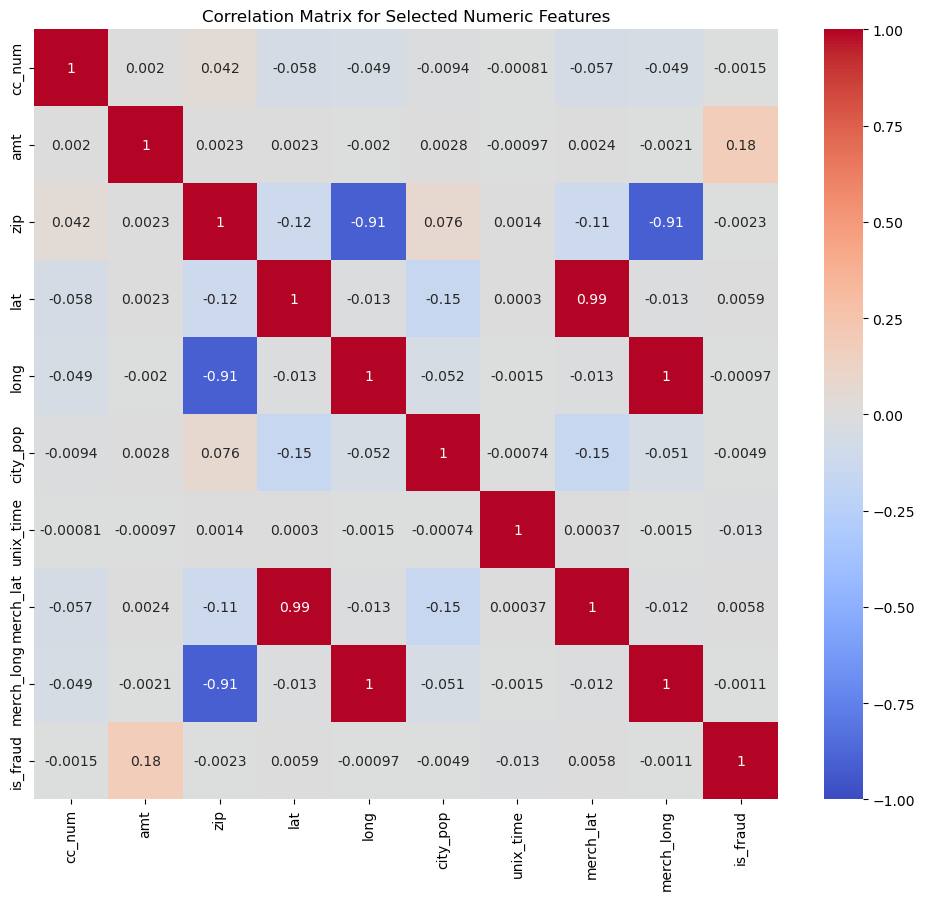

Top Positive Correlations:
amt        lat           0.002339
           merch_lat     0.002404
           city_pop      0.002760
merch_lat  is_fraud      0.005812
lat        is_fraud      0.005863
cc_num     zip           0.041610
zip        city_pop      0.075571
amt        is_fraud      0.182267
lat        merch_lat     0.993557
long       merch_long    0.999115
dtype: float64

Top Negative Correlations:
zip       long         -0.909942
          merch_long   -0.909117
lat       city_pop     -0.152666
city_pop  merch_lat    -0.151703
zip       lat          -0.115173
          merch_lat    -0.114809
cc_num    lat          -0.057512
          merch_lat    -0.057183
long      city_pop     -0.051524
city_pop  merch_long   -0.051489
dtype: float64


In [179]:
# Ensure all necessary libraries are imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df is your DataFrame

# Ensure 'amt' is numeric and convert if necessary
df['amt'] = pd.to_numeric(df['amt'], errors='coerce')

# Select only numeric columns for correlation calculation
numeric_columns = ['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']
df_numeric = df[numeric_columns]

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Selected Numeric Features')
plt.show()

## To see which features have positive correlations

# Display the top positive and negative correlations
print("Top Positive Correlations:")
print(sorted_corr_pairs[sorted_corr_pairs > 0].tail(10))  # Display top 10 positive correlations

print("\nTop Negative Correlations:")
print(sorted_corr_pairs[sorted_corr_pairs < 0].head(10))  # Display top 10 negative correlations

#### We can see there is some very positive correlations between the distance features namely "merch_lat", "mercg_long", "lat" and "long".
#### "amt", is an important feature
## Analysis
- amt (Amount): Correlation with is_fraud: 0.18
- lat (Latitude): Correlation with is_fraud: 0.0059
- merch_lat (Merchant Latitude): Correlation with is_fraud: 0.0058
- zip (ZIP Code):Correlation with is_fraud: -0.0023
- long (Longitude): Correlation with is_fraud: -0.0021
- cc_num (Credit Card Number):Correlation with is_fraud: -0.0015
- merch_long (Merchant Longitude): Correlation with is_fraud: -0.0011
- city_pop (City Population):Correlation with is_fraud: -0.0049
- unix_time: Correlation with is_fraud: -0.013

#### Focus on amt as an important feature for predicting fraud.
#### Consider dropping features with very weak correlations with is_fraud such as cc_num, zip, lat, long, city_pop, unix_time, merch_lat, and merch_long.
#### Be cautious of multicollinearity between highly correlated features like lat/merch_lat and long/merch_long or zip/long.

# Feature Engineering

## 1. Transaction Frequency Features


In [180]:
#Statistic summary of total transaction per user
df['cc_num'].value_counts().agg(['mean', 'median', 'min', 'max'])



mean       614.733407
median     636.500000
min          6.000000
max       2144.000000
Name: count, dtype: float64

In [181]:
# Total transactions of all users per day
df['transactions_per_day'] = df.groupby(['cc_num', df['trans_date'].dt.day])['trans_date'].transform('count')

print(df[['cc_num', 'trans_date', 'transactions_per_day']].head())


         cc_num trans_date  transactions_per_day
0  2.291160e+15 2020-06-21                    21
1  3.573030e+15 2020-06-21                    36
2  3.598220e+15 2020-06-21                    45
3  3.591920e+15 2020-06-21                    29
4  3.526830e+15 2020-06-21                    29


In [182]:
# Create a 'Week' column using ISO calendar weeks
df['Week'] = df['trans_date'].dt.isocalendar().week

# Calculate total transactions per week for each customer
df['transaction_per_week'] = df.groupby(['cc_num', 'Week'])['trans_date'].transform('count')

# Display the updated dataframe with Week and total transactions per Week each customer columns
print(df[['cc_num', 'Week', 'transaction_per_week']].head())

         cc_num  Week  transaction_per_week
0  2.291160e+15    25                     2
1  3.573030e+15    25                     4
2  3.598220e+15    25                     3
3  3.591920e+15    25                     3
4  3.526830e+15    25                     4


In [183]:
# Calculate total transactions per month for all users
total_transactions_per_month = df.groupby(df['trans_date'].dt.month).size()
# Display the total transactions per month
print(total_transactions_per_month)

trans_date
6      30058
7      85848
8      88759
9      69533
10     69348
11     72635
12    139538
dtype: int64


In [184]:
# Total transactions of all users per day
df['transactions_per_month'] = df.groupby(['cc_num', df['trans_date'].dt.month])['trans_date'].transform('count')
print(df[['cc_num', 'trans_date', 'transactions_per_month']].head())

         cc_num trans_date  transactions_per_month
0  2.291160e+15 2020-06-21                      34
1  3.573030e+15 2020-06-21                      49
2  3.598220e+15 2020-06-21                      55
3  3.591920e+15 2020-06-21                      33
4  3.526830e+15 2020-06-21                      56


In [185]:
#Transaction per season of all users
def season(date):
    if date.month in [1, 2, 3]:
        return 'Autumn'
    elif date.month in [4, 5, 6]:
        return 'Winter'
    elif date.month in [7, 8, 9]:
        return 'Spring'
    else:
        return 'Summer'
df['transactions_per_season'] = df.groupby(['cc_num', df['trans_date'].apply(season)])['trans_date'].transform('count')

print(df.dtypes)

trans_date                 datetime64[ns]
trans_time                         object
cc_num                            float64
merchant                           object
category                           object
amt                               float64
first                              object
last                               object
gender                             object
street                             object
city                               object
state                              object
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                object
dob                        datetime64[ns]
trans_num                          object
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
transactions_per_day              

## 2. User Transaction Behavior

In [186]:
## Perform the aggregations
agg_df = df.groupby('cc_num')['amt'].agg(
    avg_trans_amount='mean',
    total_trans_amount='sum',
    med_trans_amount='median',
    std_trans_amount='std'
).reset_index()

# Merge the aggregation results back to the original DataFrame
df = df.merge(agg_df, on='cc_num', how='left')

In [187]:
print(df.dtypes)

trans_date                 datetime64[ns]
trans_time                         object
cc_num                            float64
merchant                           object
category                           object
amt                               float64
first                              object
last                               object
gender                             object
street                             object
city                               object
state                              object
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                object
dob                        datetime64[ns]
trans_num                          object
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
transactions_per_day              

## 3. User-Based Features: Age and Gender

In [188]:
#Calculate user's age based on date of birth and transaction date
def calculate_age(dob, trans_date):
    return trans_date.year - dob.year - ((trans_date.month, trans_date.day) < (dob.month, dob.day))
df['age'] = df.apply(lambda row: calculate_age(row['dob'], row['trans_date']), axis=1)

#Explore age stat
df['age'].agg(['mean', 'median', 'min', 'max'])
print(df.dtypes)

trans_date                 datetime64[ns]
trans_time                         object
cc_num                            float64
merchant                           object
category                           object
amt                               float64
first                              object
last                               object
gender                             object
street                             object
city                               object
state                              object
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                object
dob                        datetime64[ns]
trans_num                          object
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
transactions_per_day              

In [189]:
#Convert gender to binary values
print('\n The number of cutomers based on age is:')
print(df['gender'].value_counts())
print("-" * 40)

#Total transaction amount by gender
print('\nTotal transaction amount made by gender is:')
print(df.groupby('gender')['amt'].sum())
print("-" * 40)

#Average transaction made by gender
print('\n Average transaction amount made by gender is:')
print(df.groupby('gender')['amt'].mean())
print("-" * 40)

# Calculate mean and median of age distribution by gender
print('\n Age Distribution by gender is:')
print(df.groupby('gender')['age'].agg(['mean', 'median']))
print("-" * 40)

print(df.dtypes)


 The number of cutomers based on age is:
gender
F    304886
M    250833
Name: count, dtype: int64
----------------------------------------

Total transaction amount made by gender is:
gender
F    21155705.55
M    17407197.56
Name: amt, dtype: float64
----------------------------------------

 Average transaction amount made by gender is:
gender
F    69.388905
M    69.397558
Name: amt, dtype: float64
----------------------------------------

 Age Distribution by gender is:
             mean  median
gender                   
F       46.300604    44.0
M       46.499759    45.0
----------------------------------------
trans_date                 datetime64[ns]
trans_time                         object
cc_num                            float64
merchant                           object
category                           object
amt                               float64
first                              object
last                               object
gender                             object

## 4. Fraud Transaction Analysis

In [190]:
fraud_transactions_per_user = df.groupby('cc_num')['is_fraud'].sum().reset_index()
total_transactions_per_user = df.groupby('cc_num').size().reset_index(name='total_transactions')
fraud_ratio_per_user = pd.merge(fraud_transactions_per_user, total_transactions_per_user, on='cc_num')


#Calculate ratio of fraudulent transactions to total transactions
fraud_ratio_per_user['fraud_ratio'] = fraud_ratio_per_user['is_fraud'] /fraud_ratio_per_user['total_transactions']


# Merge the fraud ratio back into the original DataFrame
df = pd.merge(df, fraud_ratio_per_user[['cc_num', 'fraud_ratio']], on='cc_num', how='left')


# Print formatted output
print('\nThe ratio of fraudulent transaction to total transaction per user:')
for index, row in fraud_ratio_per_user.iterrows():
    print(f"Credit Card Number {int(row['cc_num'])}: {row['fraud_ratio']:.2%}")



The ratio of fraudulent transaction to total transaction per user:
Credit Card Number 60416207185: 0.00%
Credit Card Number 60422928733: 0.00%
Credit Card Number 60423098130: 0.00%
Credit Card Number 60427851591: 0.00%
Credit Card Number 60487002085: 3.35%
Credit Card Number 60490596305: 0.00%
Credit Card Number 60495593109: 5.36%
Credit Card Number 501803000000: 0.00%
Credit Card Number 501828000000: 0.00%
Credit Card Number 501831000000: 0.00%
Credit Card Number 501883000000: 5.08%
Credit Card Number 501899000000: 0.00%
Credit Card Number 502013000000: 0.00%
Credit Card Number 502038000000: 0.00%
Credit Card Number 502050000000: 0.00%
Credit Card Number 503848000000: 0.00%
Credit Card Number 503851000000: 100.00%
Credit Card Number 503874000000: 0.00%
Credit Card Number 560881000000: 0.00%
Credit Card Number 561943000000: 0.00%
Credit Card Number 565399000000: 0.00%
Credit Card Number 567868000000: 0.00%
Credit Card Number 568279000000: 0.00%
Credit Card Number 570273000000: 5.58%
C

In [191]:
print(df.dtypes)

trans_date                 datetime64[ns]
trans_time                         object
cc_num                            float64
merchant                           object
category                           object
amt                               float64
first                              object
last                               object
gender                             object
street                             object
city                               object
state                              object
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                object
dob                        datetime64[ns]
trans_num                          object
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
transactions_per_day              

In [192]:
# Function to categorize city_pop
def categorize_population(population):
    if population < 1000:
        return 'Small'
    elif 1000 <= population <= 10000:
        return 'Medium'
    else:
        return 'Large'

# Apply the function to create a new column 'pop_category'
df['pop_cat'] = df['city_pop'].apply(categorize_population)

In [193]:
# Aggregate transaction amounts by city
print("Aggregated transaction amounts by city:")
print(df.groupby('city')['amt'].sum().reset_index())
print("-" * 40)

# Aggregate transaction amounts by state
state_agg = df.groupby('state')['amt'].sum().reset_index()
print("Aggregated transaction amounts by state:")
print(df.groupby('state')['amt'].sum().reset_index())
print("-" * 40)



Aggregated transaction amounts by city:
                          city       amt
0                      Achille   9511.00
1                      Acworth  80383.39
2                        Adams  20631.64
3                        Afton  59000.66
4                        Akron  18512.11
..                         ...       ...
844                Woods Cross  20281.72
845                  Woodville  42032.17
846  Yellowstone National Park  16073.89
847                    Zaleski  59080.41
848                    Zavalla  47801.39

[849 rows x 2 columns]
----------------------------------------
Aggregated transaction amounts by state:
   state         amt
0     AK    66071.94
1     AL  1127922.81
2     AR  1027950.44
3     AZ   347901.59
4     CA  1768791.26
5     CO   447073.46
6     CT   205176.90
7     DC   108781.32
8     FL  1293183.50
9     GA   780302.43
10    HI    64858.25
11    IA   770590.61
12    ID   197705.27
13    IL  1309975.89
14    IN   846750.31
15    KS   711303.48
16   

### Total features (old + new)

In [194]:
print(df.dtypes)

trans_date                 datetime64[ns]
trans_time                         object
cc_num                            float64
merchant                           object
category                           object
amt                               float64
first                              object
last                               object
gender                             object
street                             object
city                               object
state                              object
zip                                 int64
lat                               float64
long                              float64
city_pop                            int64
job                                object
dob                        datetime64[ns]
trans_num                          object
unix_time                           int64
merch_lat                         float64
merch_long                        float64
is_fraud                            int64
transactions_per_day              

# 6. Resampling dataset

In [195]:
from sklearn.preprocessing import LabelEncoder
## handling all the categorical vairables after removing the unnccesary categorical variables namely - trans_time, first last, street, city, trans_num
label_encoder = LabelEncoder()
df['merchant'] = label_encoder.fit_transform(df['merchant'])
df['category'] = label_encoder.fit_transform(df['category'])
df['state'] = label_encoder.fit_transform(df['state'])
df['pop_cat'] = label_encoder.fit_transform(df['pop_cat'])
df['job'] = label_encoder.fit_transform(df['job'])


df = df.drop(columns=["first", "last", "street", "trans_num", "dob", "trans_date", "trans_time", "city_pop", "city", "lat", "long", "merch_lat", "merch_long", "zip"])
# Apply the mapping using pandas map function
df['gender'] = df['gender'].map({'M': 1, 'F': 0})

df.info()
print(df.dtypes)

## variables like first and last name are not important or unique
## street, lat, long, city, merch_lat, merch_long , zip are removed as they dont have high or instead show negative corr with target variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   cc_num                   555719 non-null  float64
 1   merchant                 555719 non-null  int32  
 2   category                 555719 non-null  int32  
 3   amt                      555719 non-null  float64
 4   gender                   555719 non-null  int64  
 5   state                    555719 non-null  int32  
 6   job                      555719 non-null  int32  
 7   unix_time                555719 non-null  int64  
 8   is_fraud                 555719 non-null  int64  
 9   transactions_per_day     555719 non-null  int64  
 10  Week                     555719 non-null  UInt32 
 11  transaction_per_week     555719 non-null  int64  
 12  transactions_per_month   555719 non-null  int64  
 13  transactions_per_season  555719 non-null  int64  
 14  avg_

## Correlation matrix after feature engineering to see new feature relation with Target

In [196]:
total_columns = df.shape[1]
print(f'Total number of columns: {total_columns}')

# Print all column headers
print("Column headers:")
print(df.columns.tolist())

Total number of columns: 21
Column headers:
['cc_num', 'merchant', 'category', 'amt', 'gender', 'state', 'job', 'unix_time', 'is_fraud', 'transactions_per_day', 'Week', 'transaction_per_week', 'transactions_per_month', 'transactions_per_season', 'avg_trans_amount', 'total_trans_amount', 'med_trans_amount', 'std_trans_amount', 'age', 'fraud_ratio', 'pop_cat']


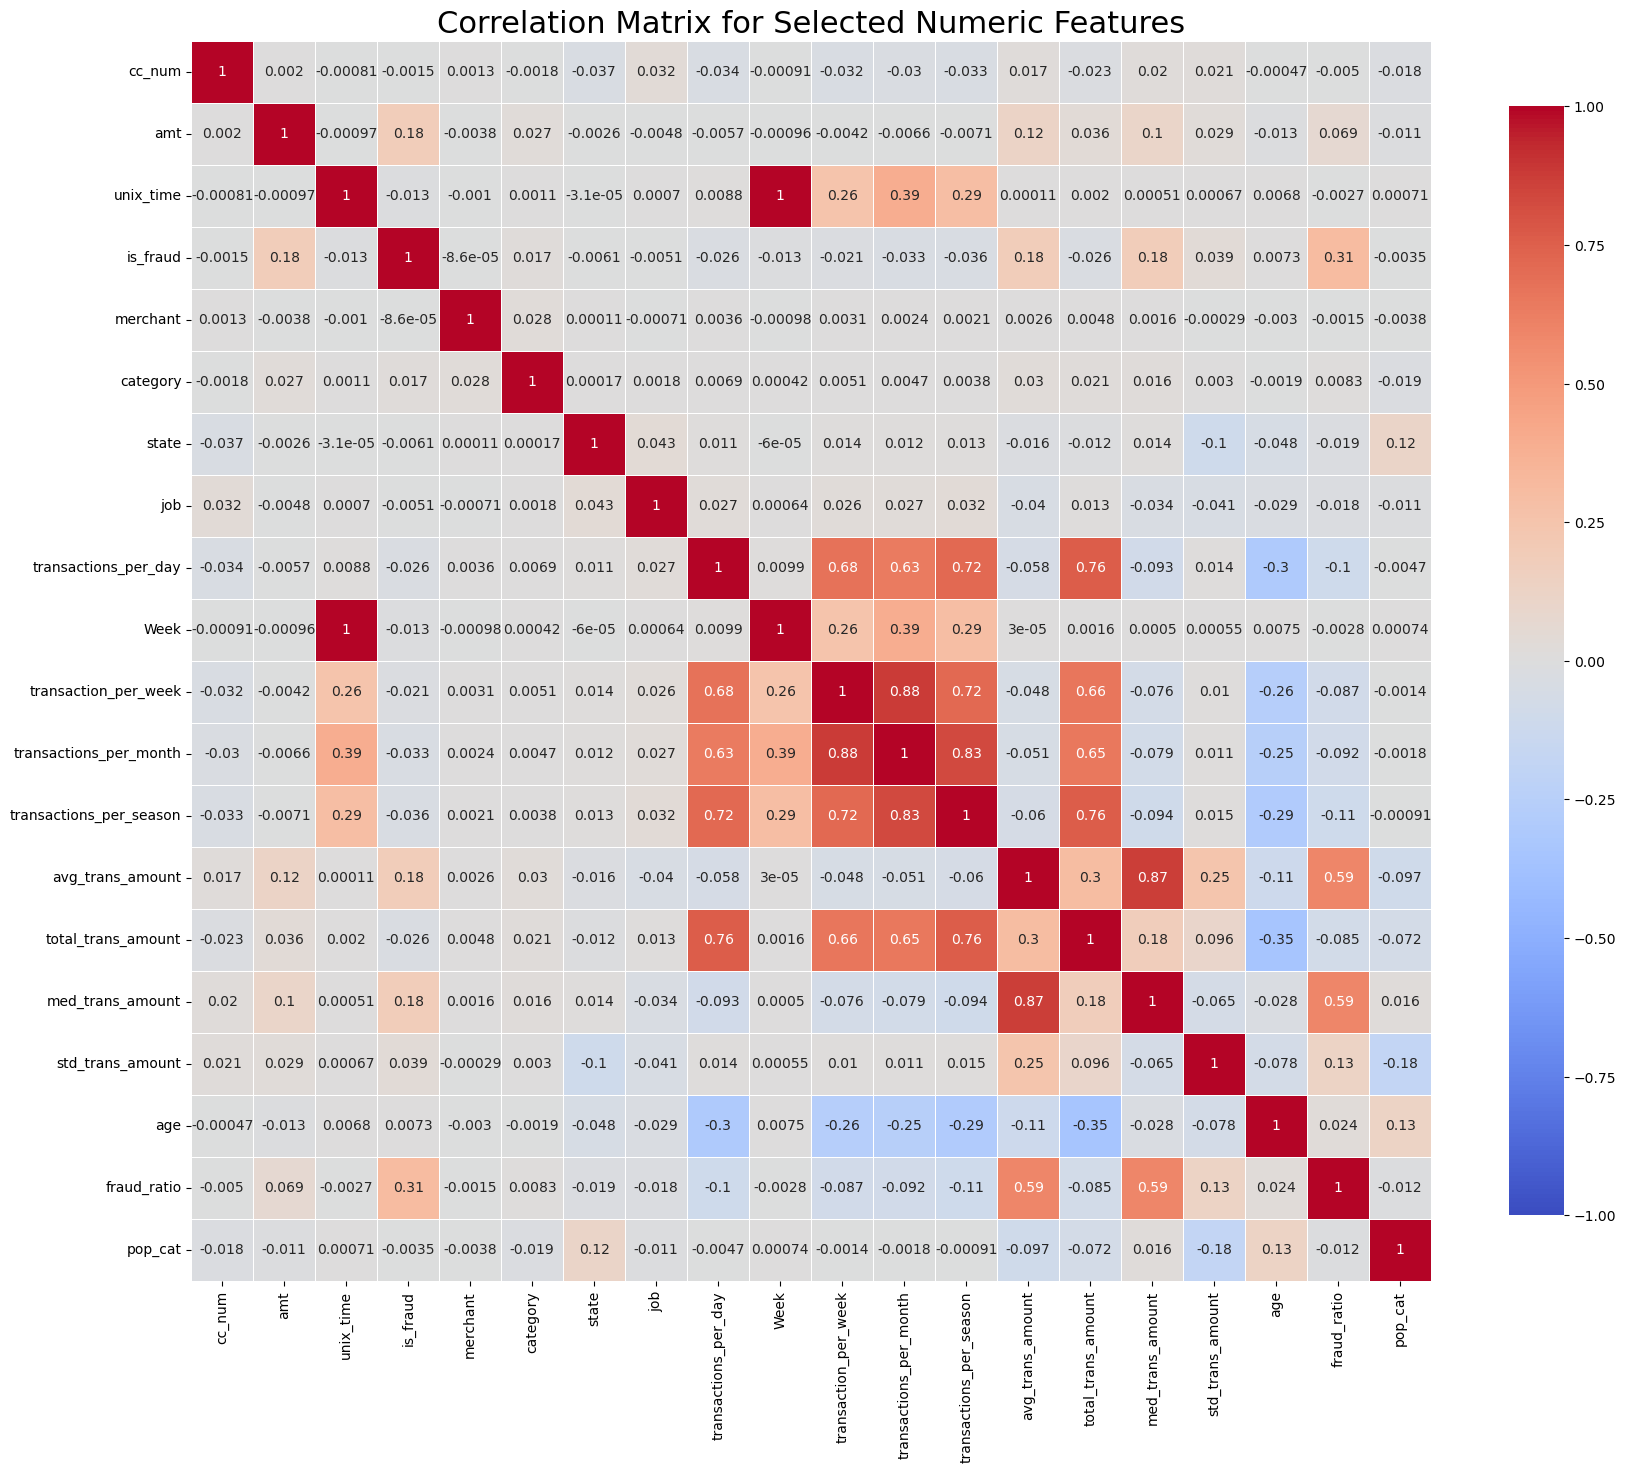

In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure 'amt' is numeric and convert if necessary
df['amt'] = pd.to_numeric(df['amt'], errors='coerce')

# Select the specified numeric columns for correlation calculation
numeric_columns = [
    'cc_num', 'amt', 'unix_time', 'is_fraud', 'merchant', 'category', 'state', 'job', 
    'transactions_per_day', 'Week', 'transaction_per_week', 
    'transactions_per_month', 'transactions_per_season', 
    'avg_trans_amount', 'total_trans_amount', 
    'med_trans_amount', 'std_trans_amount', 
    'age', 'fraud_ratio', 'pop_cat'
]

df_numeric = df[numeric_columns]

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Set up the matplotlib figure with a larger size
plt.figure(figsize=(20, 18))  # Increased size for better visibility

# Draw the heatmap without a mask
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})

plt.title('Correlation Matrix for Selected Numeric Features', fontsize=22)
plt.xticks(fontsize=10)  # Smaller font size for x-axis labels
plt.yticks(fontsize=10)  # Smaller font size for y-axis labels
plt.show()


### 

## Correlation matrix after balancing

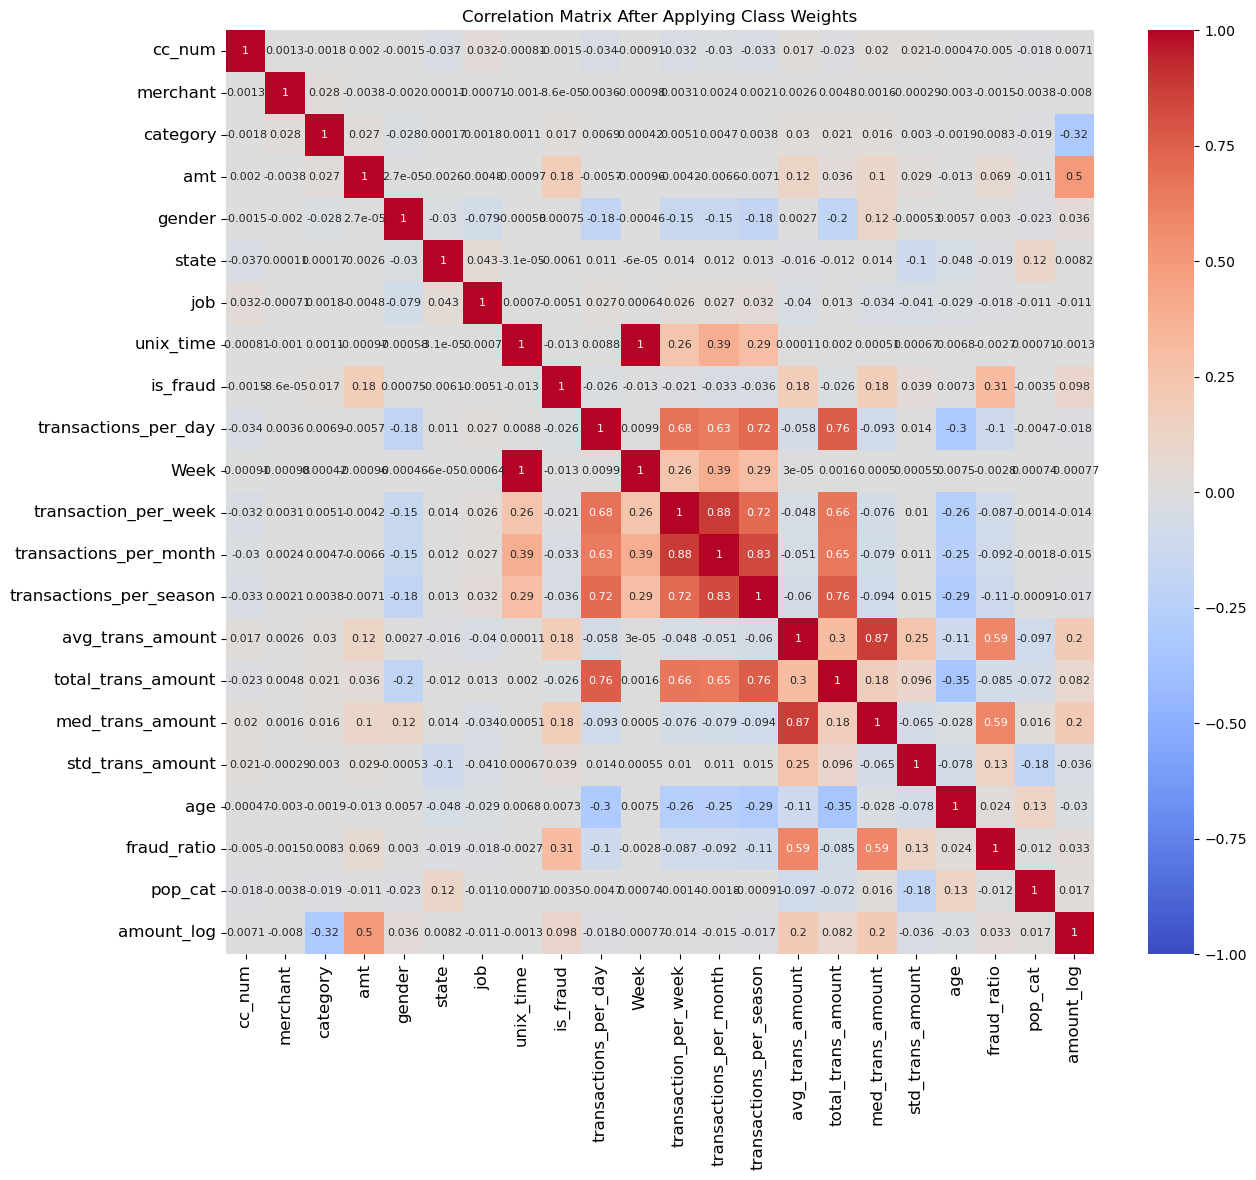

In [202]:
from sklearn.utils import class_weight
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your original DataFrame
# Convert 'amt' to numeric if necessary
df['amt'] = pd.to_numeric(df['amt'], errors='coerce')

# Create new feature based on transaction amounts
df['amount_log'] = np.log(df['amt'] + 1)

# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(df['is_fraud']), y=df['is_fraud'])
class_weights_dict = dict(enumerate(class_weights))

# Optionally, you can use the class weights in your model training process.

# Exclude non-numeric columns for the correlation matrix
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_columns]

# Calculate correlation matrix
corr_matrix = df_numeric.corr()

# Plotting the correlation matrix
plt.figure(figsize=(14, 12))  # Adjusted size for better visibility
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 8})  # Adjusted font size
plt.title('Correlation Matrix After Applying Class Weights', fontsize=12)
plt.xticks(fontsize=12)  # Adjust x-axis labels font size
plt.yticks(fontsize=12)  # Adjust y-axis labels font size
plt.show()

In [203]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Split data into features (X) and targets (y)
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the split data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.metrics import roc_auc_score
# Function to run Logistic Regression
def run_Logit(X_train, X_test, y_train, y_test, class_weight):
    logit = LogisticRegression(
        penalty='l2',
        solver='newton-cg',
        random_state=0,
        max_iter=100,
        n_jobs=4,
        class_weight=class_weight
    )

    logit.fit(X_train, y_train)
    print('Train set')
    pred_train = logit.predict_proba(X_train)
    print('roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:, 1])))
    print('Test set')
    pred_test = logit.predict_proba(X_test)
    print('roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:, 1])))
   
   # Print Confusion Matrix
    y_test_pred = logit.predict(X_test)
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_test_pred))

    # Print classification report
    print('\nClassification Report:')
    y_pred = logit.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    

(444575, 21) (111144, 21) (444575,) (111144,)


In [205]:
#Evaluate model without cost-sensitive learning
print("Baseline model (no cost-sensitive learning):")
run_Logit(X_train, X_test, y_train, y_test, class_weight=None)

# Evaluate model with balanced class weights
print("\nModel with balanced class weights:")
run_Logit(X_train, X_test, y_train, y_test, class_weight='balanced')


Baseline model (no cost-sensitive learning):
Train set
roc-auc: 0.5508535043512529
Test set
roc-auc: 0.5531418609745505
Confusion Matrix:
[[110718      0]
 [   426      0]]

Classification Report:


c:\Users\singh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\singh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\singh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.00      0.00      0.00       426

    accuracy                           1.00    111144
   macro avg       0.50      0.50      0.50    111144
weighted avg       0.99      1.00      0.99    111144


Model with balanced class weights:
Train set
roc-auc: 0.5127893728310636
Test set
roc-auc: 0.5241727768054645
Confusion Matrix:
[[ 10105 100613]
 [    32    394]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.09      0.17    110718
           1       0.00      0.92      0.01       426

    accuracy                           0.09    111144
   macro avg       0.50      0.51      0.09    111144
weighted avg       0.99      0.09      0.17    111144



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Assuming X and y are defined as in your dataset description

# Split data into features (X) and target (y)
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the split data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Scale the data (if needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to run Random Forest Classifier
def run_RandomForest(X_train, X_test, y_train, y_test, class_weight):
    rf = RandomForestClassifier(
        n_estimators=100,
        random_state=0,
        n_jobs=4,
        class_weight= class_weight  # weights / cost
    )
    
    rf.fit(X_train, y_train)
    print('Train set')
    pred_train = rf.predict_proba(X_train)
    print('roc-auc: {}'.format(roc_auc_score(y_train, pred_train[:, 1])))
    
    print('Test set')
    pred_test = rf.predict_proba(X_test)
    print('roc-auc: {}'.format(roc_auc_score(y_test, pred_test[:, 1])))

    # Print classification report
    print('\nClassification Report:')
    y_test_pred = rf.predict(X_test)
    print(classification_report(y_test, y_test_pred))

    # Print Confusion Matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_test_pred))

# Call the function to run Random Forest with balanced class weights
print("\nModel with balanced class weights:")
run_RandomForest(X_train_scaled, X_test_scaled, y_train, y_test, class_weight='balanced')


(444575, 25) (111144, 25) (444575,) (111144,)

Model with balanced class weights:
Train set
roc-auc: 1.0
Test set
roc-auc: 0.992110110217838

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.97      0.70      0.81       426

    accuracy                           1.00    111144
   macro avg       0.98      0.85      0.91    111144
weighted avg       1.00      1.00      1.00    111144

Confusion Matrix:
[[110709      9]
 [   129    297]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Assuming X and y are defined as in your dataset description

# Split data into features (X) and target (y)
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the split data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to calculate class weights
def calculate_class_weights(y):
    class_counts = np.bincount(y)
    total_samples = len(y)
    class_weights = {0: total_samples / (2 * class_counts[0]),
                     1: total_samples / (2 * class_counts[1])}
    return class_weights

# Function to run K-Nearest Neighbors Classifier
def run_KNN(X_train, X_test, y_train, y_test):
    # Calculate class weights
    class_weights = calculate_class_weights(y_train)
    
    # Initialize KNN classifier
    knn_classifier = KNeighborsClassifier(weights='distance')  # Using 'distance' for weighted KNN
    
    # Fit KNN classifier
    knn_classifier.fit(X_train, y_train)
    
    # Print the score of the model on the test set
    print("\nK-Nearest Neighbors Classifier Model")
    print("Model accuracy:", knn_classifier.score(X_test, y_test))
    
    # Predict on the test set
    y_pred = knn_classifier.predict(X_test)
    
    # Print the classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Print Confusion Matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))

# Call the function to run KNN classifier with calculated class weights
print("\nModel with K-Nearest Neighbors Classifier:")
run_KNN(X_train_scaled, X_test_scaled, y_train, y_test)

(444575, 25) (111144, 25) (444575,) (111144,)

Model with K-Nearest Neighbors Classifier:

K-Nearest Neighbors Classifier Model
Model accuracy: 0.9975347297200029

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.77      0.50      0.61       426

    accuracy                           1.00    111144
   macro avg       0.89      0.75      0.80    111144
weighted avg       1.00      1.00      1.00    111144

Confusion Matrix:
[[110655     63]
 [   211    215]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score

# Split data into features (X) and target (y)
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classifiers
rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)
logreg_classifier = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

# Train and evaluate Random Forest classifier
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
auprc_rf = average_precision_score(y_test, y_pred_rf)
print(f"\nRandom Forest AUPRC: {auprc_rf:.4f}")
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Train and evaluate Logistic Regression classifier
logreg_classifier.fit(X_train_scaled, y_train)
y_pred_logreg = logreg_classifier.predict(X_test_scaled)
auprc_logreg = average_precision_score(y_test, y_pred_logreg)
print(f"\nLogistic Regression AUPRC: {auprc_logreg:.4f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))


Random Forest AUPRC: 0.6734
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110718
           1       0.96      0.70      0.81       426

    accuracy                           1.00    111144
   macro avg       0.98      0.85      0.90    111144
weighted avg       1.00      1.00      1.00    111144

Random Forest Confusion Matrix:
[[110707     11]
 [   129    297]]

Logistic Regression AUPRC: 0.0316
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96    110718
           1       0.04      0.84      0.07       426

    accuracy                           0.92    111144
   macro avg       0.52      0.88      0.51    111144
weighted avg       1.00      0.92      0.95    111144

Logistic Regression Confusion Matrix:
[[101429   9289]
 [    69    357]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Assuming X and y are defined as in your dataset description

# Split data into features (X) and target (y)
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the split data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to run Decision Tree Classifier
def run_DecisionTree(X_train, X_test, y_train, y_test, class_weight):
    dt = DecisionTreeClassifier(
        class_weight=class_weight,
        random_state=0
    )
    
    dt.fit(X_train, y_train)
    print('Train set')
    pred_train = dt.predict_proba(X_train)[:, 1]
    print('roc-auc: {}'.format(roc_auc_score(y_train, pred_train)))
    
    print('Test set')
    pred_test = dt.predict_proba(X_test)[:, 1]
    print('roc-auc: {}'.format(roc_auc_score(y_test, pred_test)))
   
    # Print Confusion Matrix
    y_test_pred = dt.predict(X_test)
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_test_pred))

    # Print classification report
    print('\nClassification Report:')
    print(classification_report(y_test, y_test_pred))

# Call the function to run Decision Tree with balanced class weights
print("\nModel with Decision Tree Classifier:")
run_DecisionTree(X_train_scaled, X_test_scaled, y_train, y_test, class_weight='balanced')